In [1]:
import sys
sys.path.insert(1, '../../../utils')
import numpy as np
from numpy import log, ndarray, array, mean, sqrt, arange
from pandas import read_csv, DataFrame, Series, to_timedelta, date_range, to_datetime, concat
from matplotlib.pyplot import figure, savefig, show, subplots, plot, legend, setp
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import dslabs_functions
from dslabs_functions import plot_line_chart, HEIGHT, ts_aggregation_by, set_chart_labels, plot_components, plot_multiline_chart, \
    series_train_test_split, plot_forecasting_series, plot_multibar_chart, FORECAST_MEASURES, plot_forecasting_eval, plot_forecasting_series, \
    PersistenceOptimistRegressor, PersistenceRealistRegressor, scale_all_dataframe, \
    exponential_smoothing_study, rolling_mean_study, arima_study, DS_LSTM,lstm_study, prepare_dataset_for_lstm
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap
from statsmodels.tsa.stattools import adfuller
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

**Loading in Data**

(Date
 2011-01-01    0.197484
 2012-01-01    0.261964
 2013-01-01    1.000000
 2014-01-01    0.716740
 2015-01-01    0.130821
 Name: Inflation Rate (%), dtype: float64,
 Date
 2020-01-01    0.638355
 2021-01-01   -0.611511
 2022-01-01    0.451519
 2023-01-01    0.379577
 Name: Inflation Rate (%), dtype: float64)

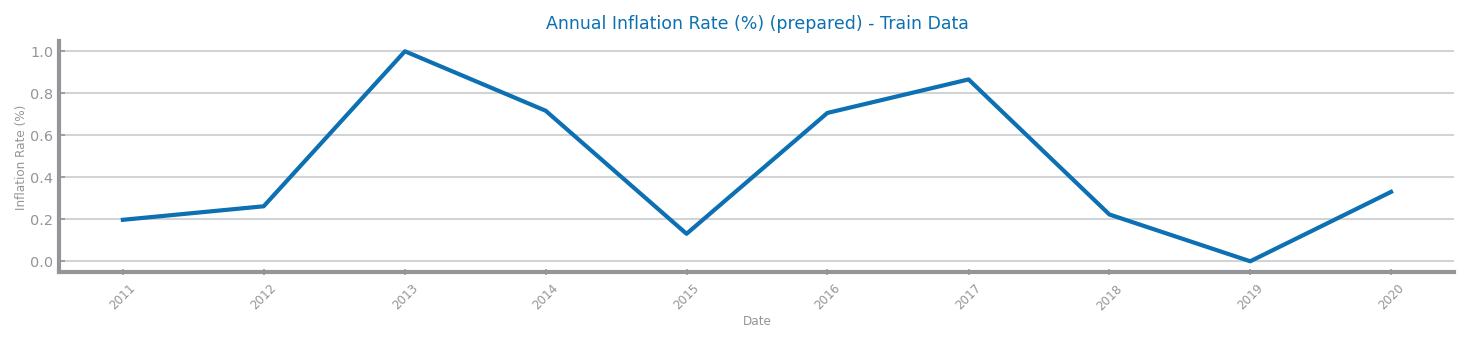

In [2]:
target = "Inflation Rate (%)"
chart_target = "inflation"
file_tag = "inflation"
timecol = "Date"

train_path = "../data/prepared/scaling/inflation_train_scaling.csv"
test_path  = "../data/prepared/scaling/inflation_test_scaling.csv"

train_df = read_csv(train_path, parse_dates=["Date"], index_col="Date")
train: Series = train_df[target]
train.index = to_datetime(train.index)  # ensure proper datetime index

# Load test
test_df = read_csv(test_path, parse_dates=["Date"], index_col="Date")
test: Series = test_df[target]
test.index = to_datetime(test.index)

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train.index.to_list(),
    train.to_list(),
    xlabel=train.index.name,
    ylabel=target,
    title=f"Annual {target} (prepared) - Train Data",
)

train.head(), test.head()

## Exponential Smoothing

Exponential Smoothing best with alpha=0.7 -> R2=-0.011456519837765633


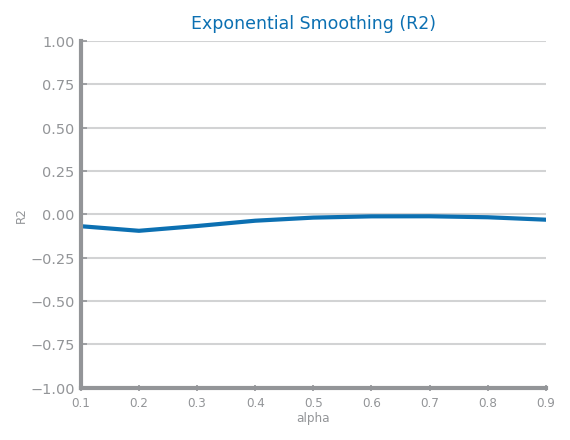

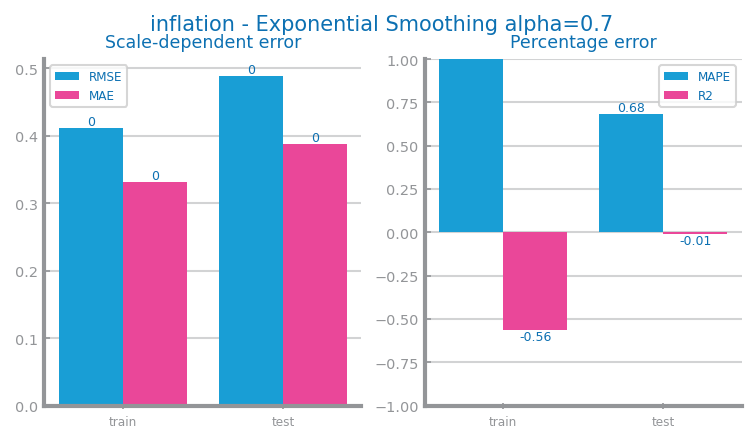

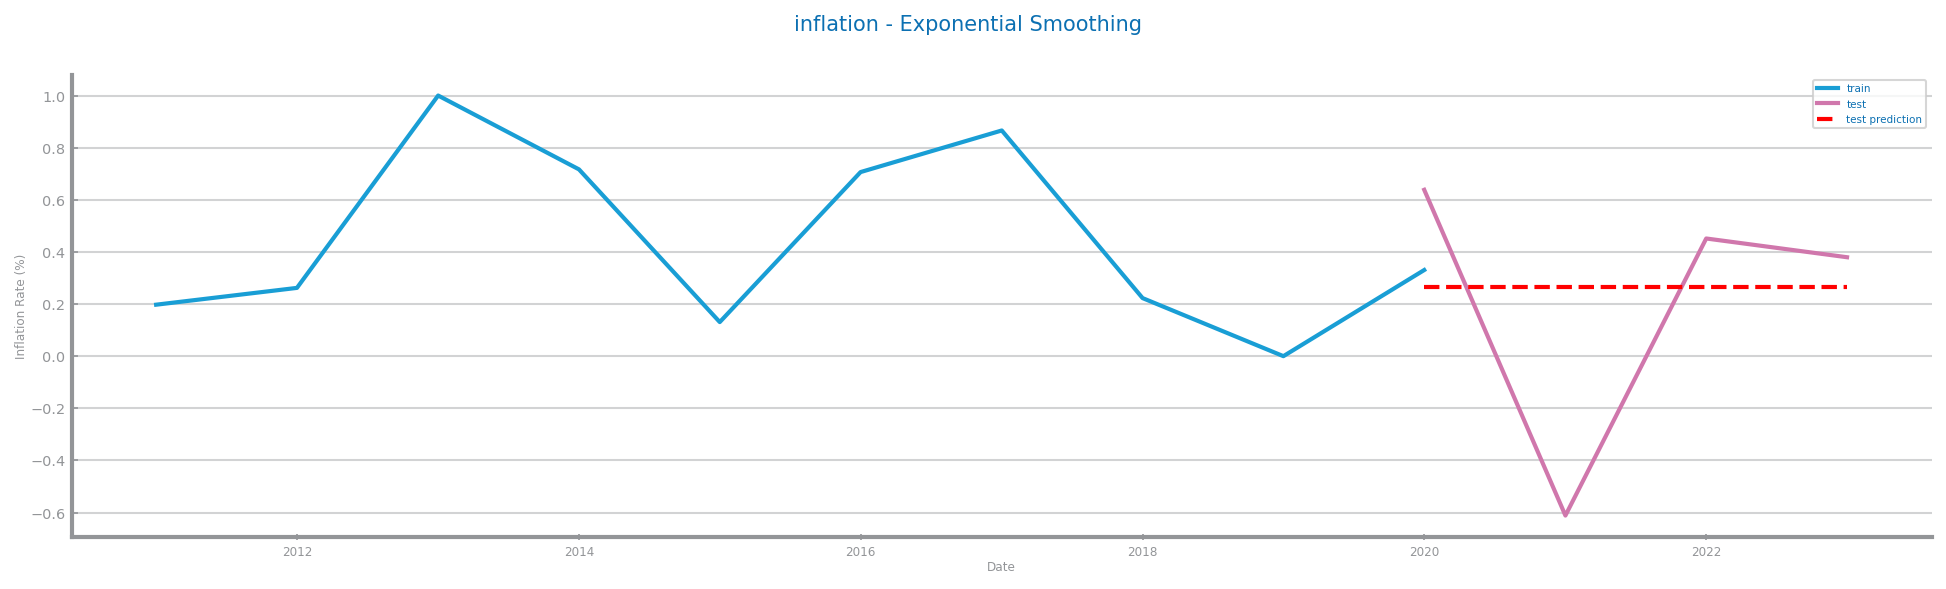

Exponential Smoothing best with alpha=0.2 -> MAPE=0.5643141280068604


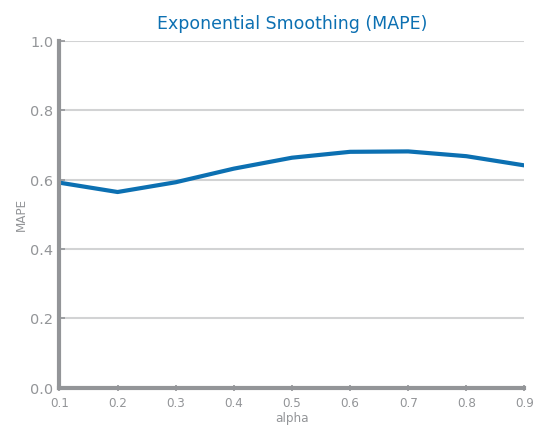

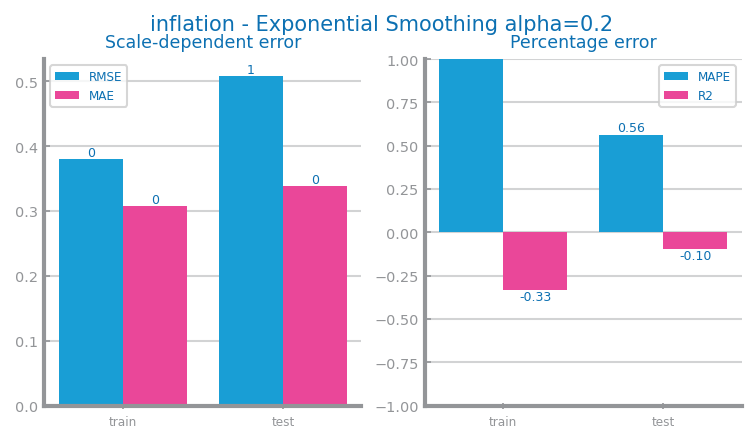

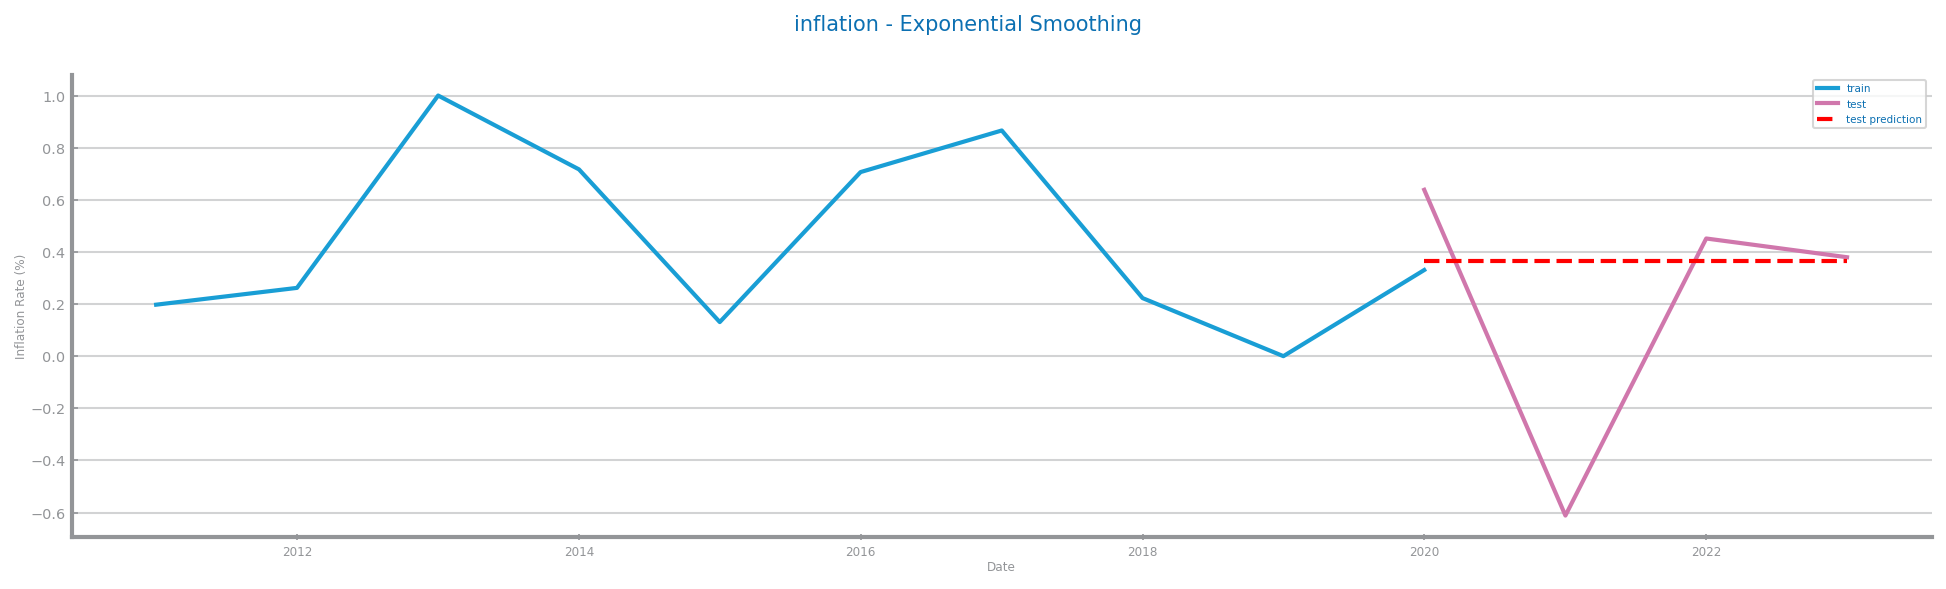

In [4]:
measures = ["R2", "MAPE"]

for measure in measures:
    best_model, best_params = exponential_smoothing_study(train, test, measure=measure)
    savefig(f"../charts/forecasting/{file_tag}_exponential_smoothing_{measure}_study.png")
    show()
    params = best_params["params"]
    prd_trn = best_model.predict(start=0, end=len(train) - 1)
    prd_tst = best_model.forecast(steps=len(test))
    prd_tst.index = test.index

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Exponential Smoothing alpha={params[0]}")
    savefig(f"../charts/forecasting/{file_tag}_exponential_smoothing_{measure}_eval.png")
    show()

    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - Exponential Smoothing ",
        xlabel=timecol,
        ylabel=target,
    )
    savefig(f"../charts/forecasting/{file_tag}_exponential_smoothing_{measure}_forecast.png")
    show()

